# INGEST

In [46]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
df = pd.read_csv("Dataset-RR.csv")

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.shape

(9551, 21)

In [6]:
# print out all null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df = df.dropna(subset=["Cuisines"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [9]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# EDA

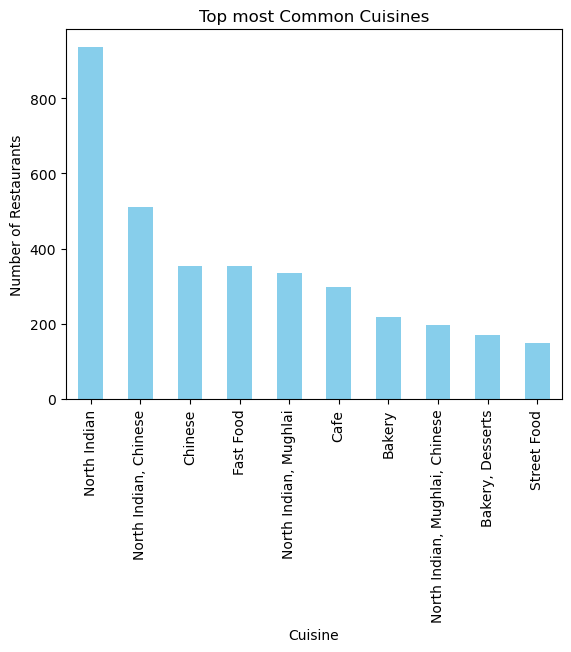

In [10]:
# Visualization of the dataset
cuisines = df["Cuisines"].value_counts().head(10)
cuisines.plot(kind="bar", color="skyblue")
plt.title("Top most Common Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.show()

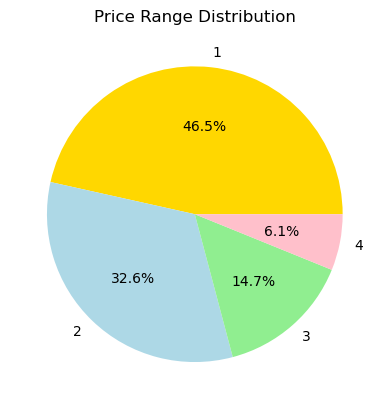

In [11]:
# Price Range Distribution
df["Price range"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", colors=["gold", "lightblue", "lightgreen", "pink"]
)
plt.title("Price Range Distribution")
plt.ylabel("")
plt.show()

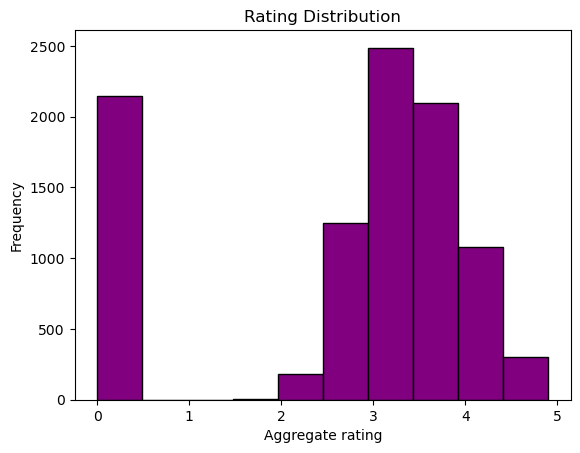

In [12]:
# Rating distribution
df["Aggregate rating"].plot(kind="hist", bins=10, color="purple", edgecolor="black")
plt.title("Rating Distribution")
plt.xlabel("Aggregate rating")
plt.ylabel("Frequency")
plt.show()

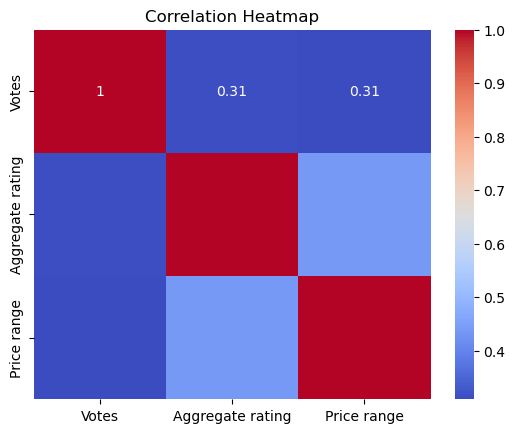

In [ ]:
# Create Heatmap check for relationships betweeen Votes, Aggregate rating, Price-range
sns.heatmap(
    df[["Votes", "Aggregate rating", "Price range"]].corr(), annot=True, cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
# List of Useful features for the Restaurant Recommendation
useful_features = df[["City", "Cuisines", "Price range", "Aggregate rating", "Votes"]]
useful_features.head()

,City,Cuisines,Price range,Aggregate rating,Votes
0,Makati City,"French, Japanese, Desserts",3,4.8,314
1,Makati City,Japanese,3,4.5,591
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4,4.4,270
3,Mandaluyong City,"Japanese, Sushi",4,4.9,365
4,Mandaluyong City,"Japanese, Korean",4,4.8,229


In [15]:
# Identify Categorical and Numerical Features

categorical_features = useful_features.select_dtypes(include=["object"]).columns
numerical_features = useful_features.select_dtypes(exclude=["object"]).columns
numerical_weight =[2.0, 0.5, 1.0]
# Preprocessing for Categorical Features
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Preprocessing for Numerical Features
numerical_transformer = StandardScaler()

# Combine both transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [17]:
# Apply the transformations
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

# Now we can fit and transform the data
X_transformed = pipeline.fit_transform(useful_features)

# MODEL

In [23]:
# Compute the similarity matrix
similarity_matrix = cosine_similarity(X_transformed)

In [39]:
# Adding the Restaurant ID and Restaurant Name to the useful_features
df = df.reset_index(drop=True)
useful_features = useful_features.reset_index(drop=True)

useful_features["Restaurant ID"] = df["Restaurant ID"]
useful_features["Restaurant Name"] = df["Restaurant Name"]

In [48]:
def recommend_restaurants(
    restaurant_id, df, X_transformed, similarity_matrix, top_n=5
):
    """
    Recommend restaurants similar to a given restaurant.

    Parameters:
        restaurant_id (int): The ID of the restaurant for which recommendations are needed.
        df (pd.DataFrame): The original DataFrame containing restaurant details.
        X_transformed (np.array): The transformed data used for similarity calculations.
        similarity_matrix (np.array): Precomputed similarity matrix.
        top_n (int): Number of recommendations to return (default is 5).

    Returns:
        pd.DataFrame: DataFrame containing recommended restaurants with details.
    """
    # Get the index of the given restaurant
    try:
        index = df[df["Restaurant ID"] == restaurant_id].index[0]
    except IndexError:
        return f"Restaurant ID {restaurant_id} not found in the dataset."

    # Compute similarity scores for the restaurant
    similarity_scores = list(enumerate(similarity_matrix[index]))

    # Sort by similarity scores in descending order
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top N most similar restaurants (exclude the input restaurant itself)
    recommend_indices = [i[0] for i in similarity_scores[1 : top_n + 1]]

    # Return the recommended restaurants with their details
    return df.iloc[recommend_indices][
        ["Restaurant Name", "Cuisines", "Aggregate rating"]
    ]

In [49]:
# Example: Recommend restaurants for a specific Restaurant ID
sample_restaurant_id = 6318506  # Replace with an actual Restaurant ID from your dataset
recommendations = recommend_restaurants(
    sample_restaurant_id, useful_features, X_transformed, similarity_matrix, top_n=5
)

# Display the recommendations
print("Recommended Restaurants:")
print(recommendations)

Recommended Restaurants:
                               Restaurant Name  \
4                                  Sambo Kojin   
9382                                      Nobu   
2                       Heat - Edsa Shangri-La   
7529  Wasabi by Morimoto - The Taj Mahal Hotel   
4996                                     Guppy   

                              Cuisines  Aggregate rating  
4                     Japanese, Korean               4.8  
9382                   Japanese, Sushi               4.4  
2     Seafood, Asian, Filipino, Indian               4.4  
7529                   Japanese, Sushi               3.9  
4996                   Japanese, Sushi               4.1  


# CONCLUSION

This project successfully developed a personalized restaurant recommendation system using content-based filtering. The model performed well in tailoring suggestions based on user preferences, providing significant value for users seeking personalized dining experiences. While the system performs effectively, future enhancements such as integrating collaborative filtering, handling the cold-start problem, and deploying the system for real-time recommendations can further improve its accuracy and scalability.